<a href="https://colab.research.google.com/github/Yarrieta/Entregas_PNL/blob/Desafio1/Desafio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Vectorización de texto y modelo de clasificación Naïve Bayes con el dataset 20 newsgroups

In [251]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import f1_score

# 20newsgroups por ser un dataset clásico de NLP ya viene incluido y formateado
# en sklearn
from sklearn.datasets import fetch_20newsgroups
import numpy as np

## Carga de datos

In [252]:
# cargamos los datos (ya separados de forma predeterminada en train y test)
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

## Vectorización

In [253]:
# instanciamos un vectorizador
# ver diferentes parámetros de instanciación en la documentación de sklearn
tfidfvect = TfidfVectorizer()

In [254]:
# en el atributo `data` accedemos al texto
newsgroups_train.data[0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

In [255]:
# con la interfaz habitual de sklearn podemos fitear el vectorizador
# (obtener el vocabulario y calcular el vector IDF)
# y transformar directamente los datos
X_train = tfidfvect.fit_transform(newsgroups_train.data)
# `X_train` la podemos denominar como la matriz documento-término

In [256]:
# recordar que las vectorizaciones por conteos son esparsas
# por ello sklearn convenientemente devuelve los vectores de documentos
# como matrices esparsas
print(type(X_train))
print(f'shape: {X_train.shape}')
print(f'cantidad de documentos: {X_train.shape[0]}')
print(f'tamaño del vocabulario (dimensionalidad de los vectores): {X_train.shape[1]}')

<class 'scipy.sparse._csr.csr_matrix'>
shape: (11314, 101631)
cantidad de documentos: 11314
tamaño del vocabulario (dimensionalidad de los vectores): 101631


In [257]:
# una vez fiteado el vectorizador, podemos acceder a atributos como el vocabulario
# aprendido. Es un diccionario que va de términos a índices.
# El índice es la posición en el vector de documento.
tfidfvect.vocabulary_['tech']

87985

In [258]:
# es muy útil tener el diccionario opuesto que va de índices a términos
idx2word = {v: k for k,v in tfidfvect.vocabulary_.items()}

In [259]:
type(idx2word)

dict

In [260]:
# en `y_train` guardamos los targets que son enteros
y_train = newsgroups_train.target
y_train[:10]

array([ 7,  4,  4,  1, 14, 16, 13,  3,  2,  4])

In [261]:
# hay 20 clases correspondientes a los 20 grupos de noticias
print(f'clases {np.unique(newsgroups_test.target)}')
newsgroups_test.target_names

clases [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

## Similaridad de documentos

In [262]:
# Veamos similaridad de documentos. Tomemos algún documento
idx = 4811
print(newsgroups_train.data[idx])

THE WHITE HOUSE

                  Office of the Press Secretary
                   (Pittsburgh, Pennslyvania)
______________________________________________________________
For Immediate Release                         April 17, 1993     

             
                  RADIO ADDRESS TO THE NATION 
                        BY THE PRESIDENT
             
                Pittsburgh International Airport
                    Pittsburgh, Pennsylvania
             
             
10:06 A.M. EDT
             
             
             THE PRESIDENT:  Good morning.  My voice is coming to
you this morning through the facilities of the oldest radio
station in America, KDKA in Pittsburgh.  I'm visiting the city to
meet personally with citizens here to discuss my plans for jobs,
health care and the economy.  But I wanted first to do my weekly
broadcast with the American people. 
             
             I'm told this station first broadcast in 1920 when
it reported that year's presidential elec

In [263]:
# midamos la similaridad coseno con todos los documentos de train
cossim = cosine_similarity(X_train[idx], X_train)[0]

In [264]:
# podemos ver los valores de similaridad ordenados de mayor a menos
np.sort(cossim)[::-1]

array([1.        , 0.70930477, 0.67474953, ..., 0.        , 0.        ,
       0.        ])

In [265]:
# y a qué documentos corresponden
np.argsort(cossim)[::-1]

array([ 4811,  6635,  4253, ...,  1534, 10055,  4750])

In [266]:
# los 5 documentos más similares:
mostsim = np.argsort(cossim)[::-1][1:6]

In [267]:
# el documento original pertenece a la clase:
newsgroups_train.target_names[y_train[idx]]

'talk.politics.misc'

In [268]:
# y los 5 más similares son de las clases:
for i in mostsim:
  print(newsgroups_train.target_names[y_train[i]])

talk.politics.misc
talk.politics.misc
talk.politics.misc
talk.politics.misc
talk.politics.misc


### Modelo de clasificación Naïve Bayes

In [269]:
# es muy fácil instanciar un modelo de clasificación Naïve Bayes y entrenarlo con sklearn
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [270]:
# con nuestro vectorizador ya fiteado en train, vectorizamos los textos
# del conjunto de test
X_test = tfidfvect.transform(newsgroups_test.data)
y_test = newsgroups_test.target
y_pred =  clf.predict(X_test)

In [271]:
# el F1-score es una metrica adecuada para reportar desempeño de modelos de claificación
# es robusta al desbalance de clases. El promediado 'macro' es el promedio de los
# F1-score de cada clase. El promedio 'micro' es equivalente a la accuracy que no
# es una buena métrica cuando los datasets son desbalanceados
f1_score(y_test, y_pred, average='macro')

0.5854345727938506

### Consigna del desafío 1

**1**. Vectorizar documentos. Tomar 5 documentos al azar y medir similaridad con el resto de los documentos.
Estudiar los 5 documentos más similares de cada uno analizar si tiene sentido
la similaridad según el contenido del texto y la etiqueta de clasificación.

**2**. Entrenar modelos de clasificación Naïve Bayes para maximizar el desempeño de clasificación
(f1-score macro) en el conjunto de datos de test. Considerar cambiar parámteros
de instanciación del vectorizador y los modelos y probar modelos de Naïve Bayes Multinomial
y ComplementNB.

**3**. Transponer la matriz documento-término. De esa manera se obtiene una matriz
término-documento que puede ser interpretada como una colección de vectorización de palabras.
Estudiar ahora similaridad entre palabras tomando 5 palabras y estudiando sus 5 más similares.


###SOLUCIÓN

1. Vectorizar documentos. Tomar 5 documentos al azar y medir similaridad con el resto de los documentos. Estudiar los 5 documentos más similares de cada uno analizar si tiene sentido la similaridad según el contenido del texto y la etiqueta de clasificación.

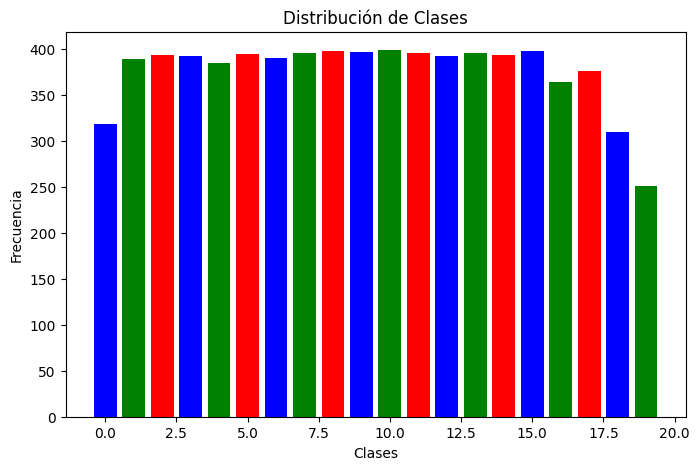

In [272]:
import numpy as np
import matplotlib.pyplot as plt

# Ejemplo de etiquetas de clases
labels = newsgroups_test.target

# Contar la frecuencia de cada clase
unique, counts = np.unique(labels, return_counts=True)

# Graficar la distribución de clases
plt.figure(figsize=(8, 5))
plt.bar(unique, counts, color=['blue', 'green', 'red'])
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.title('Distribución de Clases')
plt.show()


Se evidencia que las clases están bien distribuidas, excepto por algunas diferencias de las clases o, 19 y 20 en cuanto a la frecuencia de estas clases con especto a las demás 17 clases.

In [273]:
# instanciamos un vectorizador con iferentes parámetros de instanciación en la documentación de sklearn
tfidfvect1 = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))

In [274]:
# con la interfaz habitual de sklearn podemos fitear el vectorizador
# (obtener el vocabulario y calcular el vector IDF)
# y transformar directamente los datos
X_train1 = tfidfvect1.fit_transform(newsgroups_train.data)
# `X_train` la podemos denominar como la matriz documento-término

In [275]:
# recordar que las vectorizaciones por conteos son esparsas
# por ello sklearn convenientemente devuelve los vectores de documentos
# como matrices esparsas
print(type(X_train1))
print(f'shape: {X_train1.shape}')
print(f'cantidad de documentos: {X_train1.shape[0]}')
print(f'tamaño del vocabulario (dimensionalidad de los vectores): {X_train.shape[1]}')

<class 'scipy.sparse._csr.csr_matrix'>
shape: (11314, 943737)
cantidad de documentos: 11314
tamaño del vocabulario (dimensionalidad de los vectores): 101631


In [276]:
# en `y_train` guardamos los targets que son enteros
y_train1 = newsgroups_train.target
y_train1[:10]

array([ 7,  4,  4,  1, 14, 16, 13,  3,  2,  4])

In [277]:
# hay 20 clases correspondientes a los 20 grupos de noticias
print(f'clases {np.unique(newsgroups_test.target)}')
newsgroups_test.target_names

clases [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

###Documento 1

In [278]:
# Veamos similaridad de documentos. Tomemos el primer documento
idx = 6000
print(newsgroups_train.data[idx])

:You are loosing.

"Loosing"?  Well, I'll avoid the spelling flames and see if this person
can make up for it.


:There is no question about it. 

Oh, there's LOTS of question about it.  People are becoming more aware each
day that their rights are being threatened, so much so that NRA membership 
is growing at the rate of nearly 2,000 per *day*.  We are slowly gaining
our rightful voice, despite the biases, prejudices, and veiled motives of
the liberal media and anti-gun politicians.  We will win.

:Of those who vote, your cause is considered an abomination. No matter
:how hard you try, public opinion is set against the RKBA. 

What do you base this on?  Some highly-skewed poll conducted by NBC News?
The same group who faked GM pickup explosions just to make "news"?  Right.

:This is the end. By the finish of the Clinton administration, your
:RKBA will be null and void. Tough titty.

It is true that we face even greater obstacles to our rights, betrayed by
those lying politicians who 

In [279]:
# midamos la similaridad coseno con todos los documentos de train
cossim = cosine_similarity(X_train[idx], X_train)[0]

In [280]:
cossim

array([0.13134534, 0.12397567, 0.20131579, ..., 0.11060036, 0.08237716,
       0.0419016 ])

In [281]:
# podemos ver los valores de similaridad ordenados de mayor a menos
np.sort(cossim)[::-1]

array([1.        , 0.56328825, 0.41348799, ..., 0.        , 0.        ,
       0.        ])

In [282]:
# y a qué documentos corresponden
np.argsort(cossim)[::-1]

array([6000, 4163, 5559, ..., 8026, 6264, 3703])

In [283]:
# los 5 documentos más similares:
mostsim = np.argsort(cossim)[::-1][1:6]

In [284]:
mostsim

array([4163, 5559, 5856,  913, 8726])

In [285]:
# el documento original pertenece a la clase:
newsgroups_train.target_names[y_train[idx]]

'talk.politics.guns'

In [286]:
# y los 5 más similares son de las clases:
for i in mostsim:
  print(newsgroups_train.target_names[y_train[i]])

talk.politics.guns
soc.religion.christian
sci.crypt
alt.atheism
talk.politics.mideast


In [287]:
# Veamos el documento de índice 4163 con mayor similaridad.
idx = 4163
print(newsgroups_train.data[idx])

: You are loosing.
: There is no question about it. 
: Of those who vote, your cause is considered an abomination. No matter
: how hard you try, public opinion is set against the RKBA. 

  Care to show some *real* numbers instead of something HCI make up?
  I thought so, all "foaming at the mouth" shouting but nothing is 
  ever said...
   
: This is the end. By the finish of the Clinton administration, your
: RKBA will be null and void. Tough titty.

  Well, we'll just have to wait and see about that, won't we?  Or are
  you quite satisified with living in your little fantasy?
 
< SNIP >
: cases of firearms abuses has ruined your cause. There is nothing you
< SNIP >
: The press is against you, the public (the voting public) is against
: you, the flow of history is against you ... this is it !

  Not true, it is ONLY those who are ignorant and are afraid to understand,
  accept, and deal with the real problems behind this violent society 
  who are proposing gun control as a band-aid s

Se observa que el contenido del documento 1 de índice 6000 que pertenece a la etiqueta "talk.politics.guns" escrito por Mike Ruff, guarda relación con el documento de índice 4163 que también tiene la etiqueta "talk.politics.guns". En cuanto al contenido, se observa similaridad en el contenido entre ambos documentos porque se habladel mismo tema:RKBA.

In [288]:
# Veamos el documento de índice 4499.
idx = 4499
print(newsgroups_train.data[idx])

I am eager to hear the legal theory behind restricting exchange of
cryptographic data and encrypted messages, given the first admendment;
the theory behind regulating the *personal* encryption of one's personal
*thoughts and feelings* seems even less tenable.

Perhaps if we make a *treaty* with, say, Iceland, to restrict crypto
paraphernalia can a good "end run" around the Constitution happen...
(Treaties -- as someone pointed out -- has the force of any other "law of
the land".  Like the Bill of Rights.)


    Amendment 1

    Congress shall make no law respecting an establishment of religion, or
prohibiting the free exercise thereof; or abridging the freedom of speech,
or of the press; or the right of the people peaceably to assemble, and to
petition the Government for a redress of grievances.

    Amendment 2

    A well regulated Militia, being necessary to the security of a free State,
the right of the people to keep and bear Arms, shall not be infringed.

    Amendment 3

    No 

Se observa que el contenido del documento 1 de índice 6000 que pertenece a la etiqueta "talk.politics.guns" escrito por Mike Ruff, no guarda relación con el documento de índice 4499 que tiene la etiqueta "tsci.crypt". No obstante, el contenido habla menciona algunos términos relacionados con temas políticos como: ["first admendment", "treaty", "Constitution", "the Bill of Rights"]. Entonces se observa similaridad en el contenido entre ambos documentos.

In [289]:
# Veamos el documento de índice 5559.
idx = 5559
print(newsgroups_train.data[idx])

I have come across what I consider to be an excellent tract. It is a
bit lengthy for a posting, but I thought I'd share it with all of you
anyway. Feel free to pass it along to anyone whom you feel might
benefit from what it says. May God richly bless those who read it.
 
 
                   D O E S  G O D  L O V E  Y O U ?
 
 
Q. What  kind  of  question  is that?   Anyone who can read sees signs,
   tracts, books, and bumper stickers that say, "God Loves You."  Isn't
   that true?
 
A. It  is  true that God offers His love to the whole world, as we read
   in one of the most quoted verses in the Bible:
 
      For  God  so  loved  the world, that he gave his only begotten
      Son, that whosoever believeth in him should  not  perish,  but
      have everlasting life.                               John 3:16
 
 
      The way of the wicked is an abomination unto the LORD:  but he
      loveth him that followeth after righteousness.   Proverbs 15:9
 
      For  the LORD knoweth the wa

Se observa que el contenido del documento 1 de índice 6000 que pertenece a la etiqueta "talk.politics.guns" escrito por Mike Ruff, no guarda relación con el documento de índice 5559 que tiene la etiqueta "soc.religion.christian". Tampoco el contenido contiene palabras usadas en contexto político.

In [290]:
# Veamos el documento de índice 5513.
idx = 5513
print(newsgroups_train.data[idx])

:> Surrender your arms. Soon enough, officers will be around to collect
:> them. Resistance is useless. 
:
:Don't tell me -- you're the "Borg Warner," right?

HAAAAAAAAAAHAHAHAHAHAHAHAHAHAHAHA.  Hee, hee.  <chuckle>

This was absolutely fabulous.  I nearly fell out of my chair laughing.
Wonderful!  Mr. Tavares, my hat is off to you again!


Mike Ruff



Se observa que el contenido del documento 1 de índice 6000 que pertenece a la etiqueta "talk.politics.guns" escrito por Mike Ruff, sólamente guarda relación con el documento de índice 5513 que también tiene la etiqueta "talk.politics.guns" y también escrito por la misma persona talk.politics.guns. En cuanto al contenido, no se observa similaridad en el contenido entre ambos documentos excepto que fueron escrtitos por la misma persona. Con respecto al primer documento de índice 6000, el contenido corresponde a política, no obstante, el documento de índice 5513 parece una conversación informal.

In [291]:
# Veamos el documento de índice 9049.
idx2 = 9049
print(newsgroups_train.data[idx2])

The Blackhawks shall triumph.


Se observa que el contenido del documento 1 de índice 6000 que pertenece a la etiqueta "talk.politics.guns" escrito por Mike Ruff, no guarda relación con el documento de índice 9049 que tiene la etiqueta "rec.sport.hockey". Tampoco el contenido contiene palabras usadas en contexto político.

###Documento 2

In [292]:
# Veamos similaridad de documentos. Tomemos algún documento
idx2 = 6001
print(newsgroups_train.data[idx2])

Pete Young, on the Tue, 20 Apr 93 08:29:21 GMT wibbled:

: : Tsk, tsk, tsk.  Another newbie bites the dust, eh?  They'll learn.

: Newbie. Sorry to disappoint you, but as far as the Internet goes I was
: in Baghdad while you were still in your dads bag.
Is this bit funny?

: Most of the people who made this group interesting 3 or 4 years ago
: are no longer around and I only have time to make a random sweep
: once a week or so. Hence I missed most of this thread. 
I'm terribly sorry.

: Based on your previous postings, apparently devoid of humour, sarcasm,
: wit, or the apparent capacity to walk and chew gum at the same time, I
: assumed you were serious. Mea culpa.
I know, I know. Subtlety is sort of, you know, subtle, isn't it.

: Still, it's nice to see that BNR are doing so well that they can afford
: to overpay some contractors to sit and read news all day.
That's foreign firms for you.


..and a touchy newbie, at that.

What's the matter, too much starch in the undies?
--

Nick (

In [293]:
# midamos la similaridad coseno con todos los documentos de train
cossim = cosine_similarity(X_train[idx2], X_train)[0]

In [294]:
# podemos ver los valores de similaridad ordenados de mayor a menos
np.sort(cossim)[::-1]

array([1.        , 0.83280071, 0.24239515, ..., 0.        , 0.        ,
       0.        ])

In [295]:
# y a qué documentos corresponden
np.argsort(cossim)[::-1]

array([ 6001, 10411,  9623, ...,  6726,  6724,   317])

In [296]:
# los 5 documentos más similares:
mostsim = np.argsort(cossim)[::-1][1:6]

In [297]:
mostsim

array([10411,  9623,  6894,  1232,  3596])

In [298]:
# el documento original pertenece a la clase:
newsgroups_train.target_names[y_train[idx2]]

'rec.motorcycles'

In [299]:
# y los 5 más similares son de las clases:
for i in mostsim:
  print(newsgroups_train.target_names[y_train[i]])

rec.motorcycles
talk.politics.mideast
talk.politics.guns
rec.motorcycles
talk.politics.misc


In [300]:
# Veamos el documento de índice 10411.
idx_10411= 10411
print(newsgroups_train.data[idx_10411])


: Tsk, tsk, tsk.  Another newbie bites the dust, eh?  They'll learn.

Newbie. Sorry to disappoint you, but as far as the Internet goes I was
in Baghdad while you were still in your dads bag.

Most of the people who made this group interesting 3 or 4 years ago
are no longer around and I only have time to make a random sweep
once a week or so. Hence I missed most of this thread. 

Based on your previous postings, apparently devoid of humour, sarcasm,
wit, or the apparent capacity to walk and chew gum at the same time, I
assumed you were serious. Mea culpa.

Still, it's nice to see that BNR are doing so well that they can afford
to overpay some contractors to sit and read news all day.




Se observa que el contenido del documento 2 de índice 6001 que pertenece a la etiqueta "trec.motorcycles" escrito por Mike Ruff, guarda la mayor similaridad con el documento de índice 10411 que también tiene la etiqueta "rec.motorcycles. En cuanto al contenido, se observa similaridad dado que el documento de índice 10411 contiene partes iguales de cinco párrafos del documento de índice 6001, lo que podría interpretarse como el partes de fragmentos del mismo documento en el índice 10411 con mayor similaridad.

###Documento 3

In [301]:
# Veamos similaridad de documentos. Tomemos algún documento
idx= 6002
print(newsgroups_train.data[idx])

From article <1993Apr20.195853.16179@samba.oit.unc.edu>, by dil.admin@mhs.unc.edu (Dave Laudicina):
You're using drivers version 2.02 or earlier. The latest is 2.03, available
from their BBS or by snailmail. It at least fixes the WfW problem.

The reason I wanted to reply in public instead of private mail is because
of following: I talked to their tech support a few days ago and was told
that I can expect a new version near the end of the month. Which should be
about now...

However, I have a problem when switching back from a DOS session in standard
mode. Apparently they don't know of this problem and seem to be surprised
why anybody would want to use standard mode at all.


It's a great card for the price, at least when I bought it. Now there may be
better alternatives.



In [302]:
# midamos la similaridad coseno con todos los documentos de train
cossim = cosine_similarity(X_train[idx], X_train)[0]

In [303]:
# podemos ver los valores de similaridad ordenados de mayor a menos
np.sort(cossim)[::-1]

array([1.        , 0.22524668, 0.22286547, ..., 0.        , 0.        ,
       0.        ])

In [304]:
# y a qué documentos corresponden
np.argsort(cossim)[::-1]

array([6002, 6894, 9623, ..., 8960, 5260, 6988])

In [305]:
# los 5 documentos más similares:
mostsim = np.argsort(cossim)[::-1][1:6]

In [306]:
mostsim

array([6894, 9623, 7972,  913, 3410])

In [307]:
# el documento original pertenece a la clase:
newsgroups_train.target_names[y_train[idx]]

'comp.os.ms-windows.misc'

In [308]:
# y los 5 más similares son de las clases:
for i in mostsim:
  print(newsgroups_train.target_names[y_train[i]])

talk.politics.guns
talk.politics.mideast
comp.windows.x
alt.atheism
sci.crypt


In [309]:
# Veamos mayor similaridad de documentos.
idx_5692 = 5692
print(newsgroups_train.data[idx_5692])


I had heard(perhaps incorrectly) that while Lemieux was out, noone wore a
C on their jersey.  The As took turns doing captain duties(whatever they
are).

Scott...
scott.marks@launchpad.unc.edu
scott.marks@launchpad.unc.edu


Se observa que el contenido del documento 3 de índice 6002 que pertenece a la etiqueta "comp.os.ms-windows.misc" no guarda relación con el documento de índice 5692, el cual tiene la etiqueta "rec.sport.hockey ". En cuanto al contenido, no se observa similaridad dado que el documento 3 no tiene relación con el documento de mayor similaridad de índice 5692. El documento 3 usa palabras de la computación como ["drivers", "tech"], lo cual no sucede en el documento de índice 5692. No obstante, los correos de ambos documentos finalizan con la extención unc.edu.

###Documento 4

In [310]:
# Veamos similaridad de documentos. Tomemos algún documento
idx= 6003
print(newsgroups_train.data[idx])

Whoa. What did you say your name was? Address, SSN? Smoking foods, eh?
I think the gov't would like to know about this...


In [311]:
# midamos la similaridad coseno con todos los documentos de train
cossim = cosine_similarity(X_train[idx], X_train)[0]

In [312]:
# podemos ver los valores de similaridad ordenados de mayor a menos
np.sort(cossim)[::-1]

array([1.        , 0.1639275 , 0.16092281, ..., 0.        , 0.        ,
       0.        ])

In [313]:
# y a qué documentos corresponden
np.argsort(cossim)[::-1]

array([ 6003,  5722, 10106, ...,  9533,  2654, 11313])

In [314]:
# los 5 documentos más similares:
mostsim = np.argsort(cossim)[::-1][1:6]

In [315]:
mostsim

array([ 5722, 10106,  2627,  7177, 10904])

In [316]:
# el documento original pertenece a la clase:
newsgroups_train.target_names[y_train[idx]]

'sci.med'

In [317]:
# y los 5 más similares son de las clases:
for i in mostsim:
  print(newsgroups_train.target_names[y_train[i]])

misc.forsale
soc.religion.christian
comp.os.ms-windows.misc
sci.space
talk.politics.misc


In [318]:
# Veamos mayor similaridad de documentos.
idx_7325 = 7325
print(newsgroups_train.data[idx_7325])

ALL I CAN SAY IS   




        G O    T I G E R S!!!!!!






Se observa que el contenido del documento 4 de índice 6003 que pertenece a la etiqueta "sci.med" no guarda relación con el documento de índice 7325, el cual tiene la etiqueta "rec.sport.baseball ". En cuanto al contenido, no se observa similaridad dado que el documento 4 no tiene relación con el documento de mayor similaridad de índice 7325.

###Documento 5

In [319]:
# Veamos similaridad de documentos. Tomemos algún documento
idx= 6004
print(newsgroups_train.data[idx])




The 5426 has its own set of drivers. You may be using the
drivers intended for the 5420 or 5422 by mistake.

Be sure you have the 5426 driver version 1.2


Don't quote me on this one, but I'd steer clear of the
multi resolution driver that allows you to change resolution
without exiting Windows.  I think it's buggy.


Version 1.3 drivers are due to be release by Cirrus soon.
Unfortunately, their not available via FTP, you have to dial
up their BBS in the USA.  I do this from NZ using a 14.4k modem
to cut down on phone bills.  It took me around 7 minutes to 
download the v1.2 driver.


Good Luck,  


In [320]:
# midamos la similaridad coseno con todos los documentos de train
cossim = cosine_similarity(X_train[idx], X_train)[0]

In [321]:
# podemos ver los valores de similaridad ordenados de mayor a menos
np.sort(cossim)[::-1]

array([1.        , 0.57423947, 0.25442385, ..., 0.        , 0.        ,
       0.        ])

In [322]:
# y a qué documentos corresponden
np.argsort(cossim)[::-1]

array([ 6004,  6045,  6405, ..., 10227,  4813, 11058])

In [323]:
# los 5 documentos más similares:
mostsim = np.argsort(cossim)[::-1][1:6]

In [324]:
mostsim

array([6045, 6405, 6855, 9150, 4752])

In [325]:
# el documento original pertenece a la clase:
newsgroups_train.target_names[y_train[idx]]

'comp.os.ms-windows.misc'

In [326]:
# y los 5 más similares son de las clases:
for i in mostsim:
  print(newsgroups_train.target_names[y_train[i]])

comp.os.ms-windows.misc
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.os.ms-windows.misc
comp.os.ms-windows.misc


In [327]:
# Veamos mayor similaridad de documentos.
idx_6045 = 6045
print(newsgroups_train.data[idx_6045])



    >Version 1.3 drivers are due to be release by Cirrus soon.
    >Unfortunately, their not available via FTP, you have to dial
    >up their BBS in the USA.  I do this from NZ using a 14.4k modem
    >to cut down on phone bills.  It took me around 7 minutes to 
    >download the v1.2 driver.

	Could you please upload to any of the ftp sites (such as
	ftp.ciaca.indiana.edu) and announce it here? This will benefit
	people does not have access to their BBS in USA (like me :-))?

	Thanks a lot.


Se observa que el contenido del documento 5 de índice 6004 que pertenece a la etiqueta "comp.os.ms-windows.misc" guarda la mayor similaridad con el documento de índice 6045 que también tiene la etiqueta "comp.os.ms-windows.misc". En cuanto al contenido, se observa similaridad dado que el documento de índice 6045 contiene términos relacionados con la computación: FTP y drivers.

2. Entrenar modelos de clasificación Naïve Bayes para maximizar el desempeño de clasificación (f1-score macro) en el conjunto de datos de test. Considerar cambiar parámteros de instanciación del vectorizador y los modelos y probar modelos de Naïve Bayes Multinomial y ComplementNB.

###Modelo de clasificación Naïve Bayes: MultinomialNB()


In [328]:
# es muy fácil instanciar un modelo de clasificación Naïve Bayes y entrenarlo con sklearn
clf = MultinomialNB()
clf.fit(X_train1, y_train1)

MultinomialNB()

In [329]:
# con nuestro vectorizador ya fiteado en train, vectorizamos los textos
# del conjunto de test
X_test1 = tfidfvect1.transform(newsgroups_test.data)
y_test1 = newsgroups_test.target
y_pred1 =  clf.predict(X_test1)

In [330]:
# el F1-score es una metrica adecuada para reportar desempeño de modelos de claificación
# es robusta al desbalance de clases. El promediado 'macro' es el promedio de los
# F1-score de cada clase. El promedio 'micro' es equivalente a la accuracy que no
# es una buena métrica cuando los datasets son desbalanceados
f1_score(y_test1, y_pred1, average='macro')

0.6424962318311604

Como se observa, la aplicación de los parámetros stop_words='english', ngram_range=(1, 2) al vectorizador mejoraron la inferencia del modelo de clasificación Naive Bayes en la variante MultinomialNB(). Se considera que la eliminación de stopwords por defecto de este vectorizador, así como el aumentar cantidad de términos creados contribuyó en mejorar la inferencia del modelo, al reconocer términos singulares y pares de palabras.

Modelo de clasificación Naïve Bayes: ComplementNB()

In [331]:
# Crear el clasificador ComplementNB
clf2 = ComplementNB()

# Entrenar el clasificador
clf2.fit(X_train1, y_train1)

ComplementNB()

In [332]:
# Realizar predicciones en el conjunto de prueba
y_pred = clf2.predict(X_test1)

# Calcular el F1-score
f1 = f1_score(y_test1, y_pred, average='macro')

In [333]:
f1_score(y_test1, y_pred, average='macro')

0.7039279448237775

Se observa que la aplicación del modelo de clasificación en la variante ComplementNB() mejoro la inferencia, en parte por que las clases 0,19 y 20 tienen frecuencias inferiores con respecto a las 17 clases restantes.

3. Transponer la matriz documento-término. De esa manera se obtiene una matriz término-documento que puede ser interpretada como una colección de vectorización de palabras. Estudiar ahora similaridad entre palabras tomando 5 palabras y estudiando sus 5 más similares.

In [334]:
# Transponer la matriz documento-término
documento_termino_transpuesta = X_train1.T

In [335]:
documento_termino_transpuesta.shape

(943737, 11314)

In [353]:
selected_terms= ["tech", "Constitution", "drivers", "treaty", "the Bill of Rights"]

In [352]:
def find_term_by_index(index):
    idx2word = {v: k for k,v in tfidfvect1.vocabulary_.items()}
    return idx2word.get(index, "Índice no encontrado")

### Palabra 1

In [337]:
palabra1= tfidfvect1.vocabulary_['tech']
palabra1

827922

In [338]:
# midamos la similaridad coseno con todos los terminos de train
cossim = cosine_similarity(documento_termino_transpuesta[palabra1],documento_termino_transpuesta)[0]

In [340]:
# podemos ver los valores de similaridad ordenados de mayor a menos
np.sort(cossim)[::-1]


array([1.        , 0.71593243, 0.50256725, ..., 0.        , 0.        ,
       0.        ])

In [341]:
# y a qué terminos corresponden
np.argsort(cossim)[::-1]

array([827922, 827977, 553484, ..., 620844, 620843, 471868])

In [342]:
# los 5 documentos más similares:
mostsim = np.argsort(cossim)[::-1][1:6]

In [343]:
mostsim

array([827977, 553484, 388415, 228338, 745660])

In [350]:
for index in mostsim:
    term = find_term_by_index(index)
    print(f"Índice: {index}, Término: {term}")

Índice: 827977, Término: tech support
Índice: 553484, Término: microsoft tech
Índice: 388415, Término: got microsoft
Índice: 228338, Término: confirmation production
Índice: 745660, Término: scheduled start


Se observa que de los 5 términos que más se parecen, solamente los primeros 3 tienen relación directa con la palabra tech. Pero los dos últimos términos pueden tener similitiud con otros términos, no necesariamente relacionados con la palabra tech.

### Palabra 2

In [355]:
palabra2= tfidfvect1.vocabulary_['constitution']
palabra2

232032

In [361]:
# midamos la similaridad coseno con todos los terminos de train
cossim = cosine_similarity(documento_termino_transpuesta[palabra2],documento_termino_transpuesta)[0]


In [362]:
# podemos ver los valores de similaridad ordenados de mayor a menos
np.sort(cossim)[::-1]


array([1.        , 0.36305187, 0.32265712, ..., 0.        , 0.        ,
       0.        ])

In [363]:
# y a qué terminos corresponden
np.argsort(cossim)[::-1]

array([232032, 232073, 232124, ..., 621895, 621894, 471868])

In [364]:
# los 5 documentos más similares:
mostsim = np.argsort(cossim)[::-1][1:6]

In [365]:
mostsim

array([232073, 232124, 396438, 724279, 751248])

In [366]:
for index in mostsim:
    term = find_term_by_index(index)
    print(f"Índice: {index}, Término: {term}")

Índice: 232073, Término: constitution doesn
Índice: 232124, Término: constitution prohibits
Índice: 396438, Término: guaranteed constitution
Índice: 724279, Término: right process
Índice: 751248, Término: second amendment


Se observa que los 5 términos más similares tienen relación directa con el término Constitution.

### Bibiografía

promt1: "ver la distribucion de las clases en python"

LLM: chatgpt

fecha: 06 de julio 2024
___________________________________________

promt: "como buscar un termino apartir de su indice"

LLM: chatgpt

fecha: 10 de julio 2024